In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
import time
from collections import deque 

## Variable Global

In [2]:
matrizDistancias = []
tiempo = 0

## Funciones Auxiliares Comunes

In [3]:
# Dado un String, Lee el archivo correspondiente
def leeArchivo(archivo):
    f = open("tsp/" + archivo)
    x = []
    y = []
    cont = 0;
    for linea in f:
        cont += 1
        sp = linea.split(" ")
        if cont > 6 and sp[0] != "EOF\n":
            i = -2
            xp = sp[i]
            while xp == "":
                i -= 1
                xp = sp[i]
            yp = sp[-1].split("\n")
            x.append(float(xp))
            y.append(float(yp[0]))  
    return x,y

In [4]:
# Calcula la distancia entre dos puntos (x,y) - (x2,y2)
def calculaDistancia(x, y, x2, y2):
    xd = x - x2
    yd = y - y2
    return round(math.sqrt(xd*xd + yd*yd))

In [5]:
# Pinta todos los puntos recibiendo una lista de puntos x e y
def pintaMapa(x,y):
    plt.figure(figsize=(15, 8))
    plt.scatter(x,y)
    plt.show()

In [6]:
# Dado un vector de resultado, pinta el resultado de este vector sobre los puntos
def pintaCamino(v,x,y,coste):
    plt.figure(figsize=(15, 8))
    xc = []
    yc = []
    for i in v:
            xc.append(x[i])
            yc.append(y[i])
    
    xc.append(x[v[0]])
    yc.append(y[v[0]])
    
    plt.plot(xc,yc,"y")
    plt.scatter(x,y, c = "black")
    plt.scatter(xc[0],yc[0],c="green")
    plt.scatter(xc[-2],yc[-2],c="red")
    
    plt.suptitle("Mejor camino con coste " + str(coste),fontsize=20)
    
    plt.show()    

In [7]:
# Calcula matriz de distancias
def calculaMatrizDistancias(x,y):
    global matrizDistancias 
    matrizDistancias = np.zeros((len(x),len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            matrizDistancias[i,j] = calculaDistancia(x[i],y[i],x[j],y[j])

In [8]:
# Calcula Coste del vector Solucion
def calculaCoste(vResultado):
    kms = 0;
    for i in range(1,len(vResultado)):
            kms += matrizDistancias[vResultado[i-1]][vResultado[i]]
    kms += matrizDistancias[vResultado[-1]][vResultado[0]]
    return kms

In [9]:
# Calcula Coste Vecino
def calculaCosteVecino(costeSolAntigua, sAntigua, sActual, i1, i2):
    if i1 + 1 > len(sActual) - 1:
        piv1 = 0
    else:
        piv1 = i1 + 1
    
    if i2 + 1 > len(sActual) - 1:
        piv = 0
    else:
        piv = i2 + 1

    
    coste = costeSolAntigua - matrizDistancias[sAntigua[i1 - 1]][sAntigua[i1]] - matrizDistancias[sAntigua[ piv1]][sAntigua[i1]]
    coste = coste - matrizDistancias[sAntigua[i2 - 1]][sAntigua[i2]] - matrizDistancias[sAntigua[piv]][sAntigua[i2]]
    coste = coste + matrizDistancias[sActual[i1 - 1]][sActual[i1]] + matrizDistancias[sActual[ piv1]][sActual[i1]]
    coste = coste + matrizDistancias[sActual[i2 - 1]][sActual[i2]] + matrizDistancias[sActual[piv]][sActual[i2]]
    return coste

In [10]:
# Genera solucion aleatoria
def solucionAleatoria(tam, num):
    vResult = list(range(0,tam))
    random.seed(num)
    for i in range(0,tam):
        rnd = random.randint(0,tam-1)
        vResult[i], vResult[rnd] = vResult[rnd], vResult[i]
    return vResult

In [11]:
# Tic
def tic():
    global tiempo 
    tiempo = time.time()

In [12]:
# Toc
def toc():
    global tiempo 
    return  (time.time() - tiempo)

In [13]:
def representaResultados(analisisResultado):
    tablaFinal = pd.DataFrame(columns=["Semilla","Coste","Numero Evaluaciones", "Tiempo"])
    for i in range(0,10):
        tablaFinal.loc[len(tablaFinal)] = [analisisResultado[i][0],analisisResultado[i][1],analisisResultado[i][2],analisisResultado[i][3]]
        
    display(tablaFinal)
    print("Media coste: ", tablaFinal[["Coste"]].mean()[0])
    print("Desviación típica coste: ", tablaFinal[["Coste"]].std()[0])
    print("Media numero de evaluaciones: ", tablaFinal[["Numero Evaluaciones"]].mean()[0])
    print("Desviación típica de evaluaciones: ", tablaFinal[["Numero Evaluaciones"]].std()[0])
    print("Media tiempo: ", tablaFinal[["Tiempo"]].mean()[0])

# Fichero a Analizar

In [14]:
# x, y = leeArchivo("st70.tsp")
# x, y = leeArchivo("ch130.tsp")
# x, y = leeArchivo("a280.tsp")
# x, y = leeArchivo("p654.tsp")
x, y = leeArchivo("vm1084.tsp")
# x, y = leeArchivo("vm1748.tsp")
calculaMatrizDistancias(x,y)

# Algoritmo Greedy

In [15]:
# Algoritmo Greedy
def greedy(x,y,mostrar):
    tic()
    vResultado = [];
    nodosNoVisitados = list(range(0,len(x)))
    i = 0;
    vResultado.append(nodosNoVisitados[i])
    del nodosNoVisitados[i]
    while i < len(x) and nodosNoVisitados != []:
        nodoActual = vResultado[-1]
        ordenad = np.sort(matrizDistancias[nodoActual,:])
        k = 0
        encontrado = False
        while k < len(y) and encontrado == False:      
            minimo = np.where(ordenad[k] == matrizDistancias[nodoActual,:])
            max = len(minimo[0])
            z = 0
            while z < max and encontrado == False:
                if (minimo[0][z] in vResultado):
                    k += 1
                    z += 1
                else:
                    encontrado = True
        vResultado.append(minimo[0][z])
        nodosNoVisitados.remove(minimo[0][z])
        i += 1
    km = calculaCoste(vResultado)
    t = toc()
    # pintaMapa(x,y)
    if mostrar == "s":
        print("Tiempo de ejecucion = " + str(t))
        pintaCamino(vResultado,x,y, km)
    return vResultado, km

Tiempo de ejecucion = 0.2683100700378418


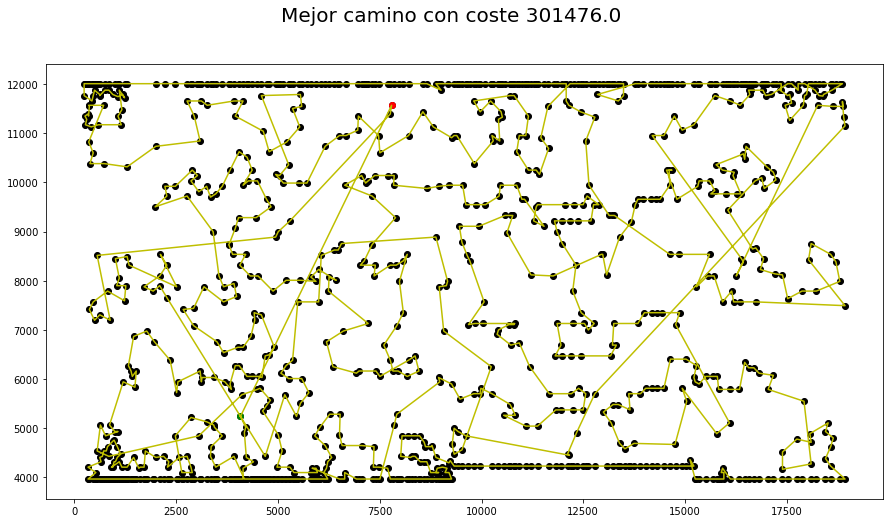

In [16]:
# Greedy
resultado, km = greedy(x, y,"s")

# Busqueda Aleatoria

In [17]:
# Algoritmo Busqueda Aleatoria
def busquedaAleatoria(x,y):
    tam = len(x)
    analisisResultado = []
    mejorCam = []
    costeFinal = float("inf")
    for z in range(0,10):
        resultadoIntermedio = []
        tic()
        mejorCoste = float("inf")
        mejor = [];
        random.seed(z)
        for j in range(0,1600*tam):
            vResult = list(range(0,tam))
            for i in range(0,tam):
                rnd = random.randint(0,tam-1)
                vResult[i], vResult[rnd] = vResult[rnd], vResult[i]
            coste = calculaCoste(vResult)
            if coste < mejorCoste:
                mejor = vResult.copy()
                mejorCoste = coste

        if mejorCoste < costeFinal:
            costeFinal = mejorCoste
            mejorCam = mejor.copy()
        t = toc()
        resultadoIntermedio.append(z)
        resultadoIntermedio.append(mejorCoste)
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)
        
    representaResultados(analisisResultado)
    pintaCamino(mejorCam,x,y, costeFinal)

Semilla      Coste       Tiempo
0      0.0  8009568.0  4928.508258
1      1.0  8017444.0  4925.753492
2      2.0  7969912.0  4930.405606
3      3.0  7958466.0  4948.953012
4      4.0  7963922.0  4952.680678
5      5.0  7939222.0  4945.650294
6      6.0  7945424.0  4940.714919
7      7.0  7992968.0  4944.215008
8      8.0  7985354.0  4947.132033
9      9.0  7967929.0  4940.892595

Media coste:  7975020.9
Desviación típica coste:  25934.26908530273


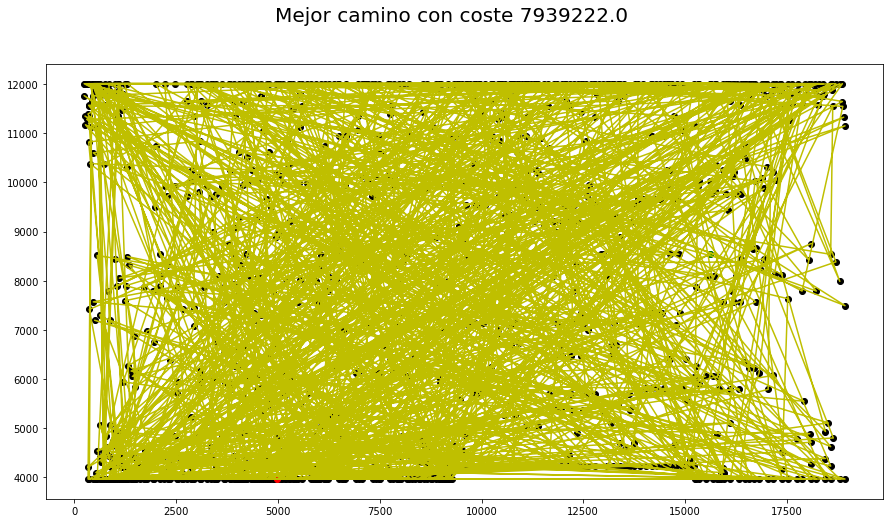

In [18]:
# Busqueda Aleatoria
busquedaAleatoria(x, y)

# Busquedas Locales

## Busqueda Local El Mejor

In [18]:
# Devuelve el mejor vecino
def mejorVecino(w, sumador, maximo):
    mejor = w;
    mejorCoste = calculaCoste(w)
    costeSolAntigua = mejorCoste.copy()
    for i in range(0, len(w)):
        for j in range(i + 1,len(w)):
            w2 = w.copy();
            w2[i], w2[j] = w2[j], w2[i]
            coste = calculaCosteVecino(costeSolAntigua, w, w2, i, j)
            if coste < mejorCoste :
                mejor = w2
                mejorCoste = coste
            if sumador >= maximo:
                break
            else :
                sumador +=1
        if sumador >= maximo:
            break
    return mejor, mejorCoste, sumador

In [19]:
# Algoritmo Busqueda Local El Mejor
def busquedaLocalElMejor(x,y):
    analisisResultado = []
    mejorCam = []
    costeFinal = float("inf")
    for z in range(0,10):
        resultadoIntermedio = []
        tic()
        w = solucionAleatoria(len(x),z)
        costeActual = calculaCoste(w)
        mejorV = []
        encontrado = False
        maximo = 1600 * len(x)
        i = 0
        while encontrado == False:
            mejorV, mejorCost, i = mejorVecino(w, i, maximo)
            if mejorCost < costeActual:
                w = mejorV.copy()
                costeActual = mejorCost
            elif i > maximo or mejorCost >= costeActual:
                encontrado = True
                
        if costeActual < costeFinal:
            costeFinal = costeActual
            mejorCam = w.copy()
        
        t = toc()
        resultadoIntermedio.append(z)
        resultadoIntermedio.append(costeActual)
        resultadoIntermedio.append(i)
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)
        
    representaResultados(analisisResultado)
    pintaCamino(mejorCam,x,y, costeFinal)

Semilla      Coste  Numero Evaluaciones     Tiempo
0      0.0  8483753.0            1734400.0  14.994878
1      1.0  8357385.0            1734400.0  13.764137
2      2.0  8491845.0            1734400.0  14.623031
3      3.0  8447783.0            1734400.0  14.426587
4      4.0  8365862.0            1734400.0  14.429132
5      5.0  8518458.0            1734400.0  14.093475
6      6.0  8539773.0            1734400.0  13.869977
7      7.0  8456359.0            1734400.0  13.046416
8      8.0  8280363.0            1734400.0  14.616853
9      9.0  8519567.0            1734400.0  15.185000

Media coste:  8446114.8
Desviación típica coste:  84855.02868199516
Media numero de evaluaciones:  1734400.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  14.304948568344116


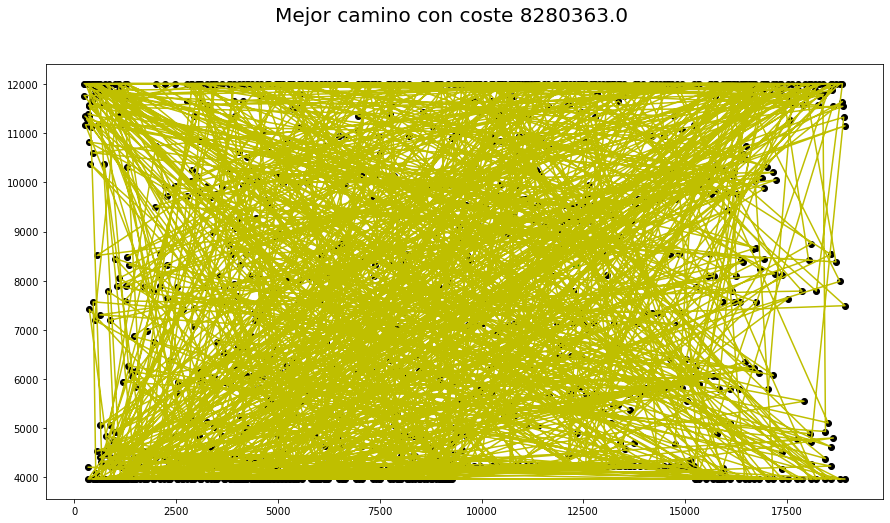

In [20]:
# Busqueda Local El Mejor
busquedaLocalElMejor(x, y)

## Busqueda Local El Primer Mejor

In [15]:
# Devuelve el primer mejor vecino
def primerMejorVecino(w, sumador, maximo):
    actual = w;
    actualCoste = calculaCoste(w)
    i = 0
    encontrado = False
    while i < len(w) and encontrado == False:
        j = i + 1
        while j < len(w) and encontrado == False:
            mejor = actual.copy()
            mejor[i], mejor[j] = mejor[j], mejor[i]
            coste = calculaCosteVecino(actualCoste, actual, mejor, i, j)
            if coste < actualCoste:
                encontrado = True
            else:
                j += 1
            if sumador >= maximo:
                break
            else :
                sumador +=1
        if sumador >= maximo:
            break
        i += 1
    if actualCoste == coste:
        mejor = w
        coste = actualCoste
    return mejor, coste, sumador

In [16]:
# Algoritmo Busqueda Local El Primer Mejor
def busquedaLocalElPrimerMejor(x,y):
    analisisResultado = []
    mejorCam = []
    costeFinal = float("inf")
    for z in range(0,10):
        resultadoIntermedio = []
        tic()
        w = solucionAleatoria(len(x),z)
        costeActual = calculaCoste(w)
        mejorV = []
        encontrado = False
        maximo = 1600 * len(x)
        i = 0
        while encontrado == False:
            mejorV, mejorCost, i = primerMejorVecino(w, i, maximo)
            if mejorCost < costeActual:
                w = mejorV.copy()
                costeActual = mejorCost
                i += 1
            elif i > maximo or mejorCost >= costeActual:
                encontrado = True
        
        if costeActual < costeFinal:
            costeFinal = costeActual
            mejorCam = w.copy()
        
        t = toc()
        resultadoIntermedio.append(z)
        resultadoIntermedio.append(costeActual)
        resultadoIntermedio.append(i)
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)
        
    representaResultados(analisisResultado)
    pintaCamino(mejorCam,x,y, costeFinal)

Semilla      Coste  Numero Evaluaciones     Tiempo
0      0.0  3017146.0            1734400.0  18.997873
1      1.0  3455899.0            1734400.0  20.742504
2      2.0  2916217.0            1734400.0  20.243582
3      3.0  3733810.0            1734400.0  19.758770
4      4.0  3763698.0            1734400.0  18.492255
5      5.0  3910507.0            1734400.0  17.976527
6      6.0  3217647.0            1734400.0  20.406428
7      7.0  3200086.0            1734400.0  20.692743
8      8.0  3357816.0            1734400.0  21.244930
9      9.0  4391955.0            1734400.0  18.416248

Media coste:  3496478.1
Desviación típica coste:  453867.67785934405
Media numero de evaluaciones:  1734400.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  19.697186183929443


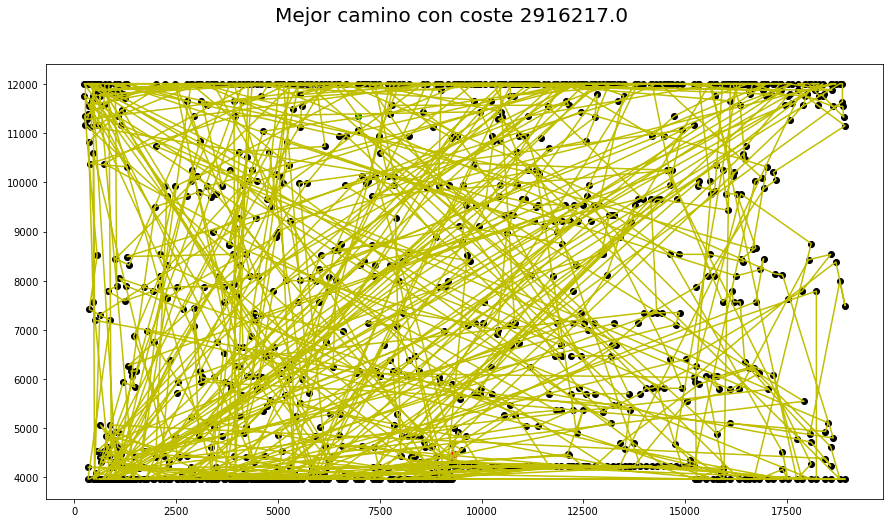

In [17]:
# Busqueda Local El Primero Mejor
busquedaLocalElPrimerMejor(x, y)

## Busqueda Local El Mejor Aleatorizado

In [16]:
# Devuelve el mejor vecino Aleatorizado
def mejorVecinoAleatorizado(w, numVecinos, sumador, maximo):
    mejor = w;
    mejorCoste = calculaCoste(w)
    costeSolAntigua = mejorCoste
    for i in range(0, numVecinos):
        w2 = w.copy();
        rnd1 = random.randint(0,len(w) - 1)
        rnd2 = random.randint(0,len(w) - 1)
        w2[rnd1], w2[rnd2] = w2[rnd2], w2[rnd1]       
        coste = calculaCosteVecino(costeSolAntigua, w, w2, rnd1, rnd2)
        if coste < mejorCoste :
            mejor = w2
            mejorCoste = coste 
        if sumador >= maximo:
            break
        else :
            sumador +=1
    return mejor, mejorCoste, sumador

In [17]:
# Algoritmo Busqueda Local El Mejor Aleatorizado
def busquedaLocalElMejorAleatorizado(x,y,numVecinosLim, k):
    analisisResultado = []
    mejorCam = []
    costeFinal = float("inf")
    for z in range(0,10):
        resultadoIntermedio = []
        tic()
        w = solucionAleatoria(len(x),z)
        costeActual = calculaCoste(w)
        mejorV = []
        encontrado = False
        maximo = 1600 * len(x)
        i = 0
        encontrado = False
        while i < maximo and encontrado == False:
            iterador = 0
            fueraBucle = False
            while iterador < k and fueraBucle == False:
                iterador += 1
                mejorV, mejorCost, i = mejorVecinoAleatorizado(w, numVecinosLim, i, maximo)  
                if mejorCost < costeActual or iterador > k:
                    fueraBucle = True
            if mejorCost < costeActual:
                w = mejorV.copy()
                costeActual = mejorCost
            elif i > maximo or mejorCost >= costeActual:
                encontrado = True
                
        if costeActual < costeFinal:
            costeFinal = costeActual
            mejorCam = w.copy()
        
        t = toc()
        resultadoIntermedio.append(z)
        resultadoIntermedio.append(costeActual)
        resultadoIntermedio.append(i)
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)
        
    representaResultados(analisisResultado)
    pintaCamino(mejorCam,x,y, costeFinal)

Semilla      Coste  Numero Evaluaciones     Tiempo
0      0.0  1634774.0            1531692.0  21.780067
1      1.0  1531399.0            1642802.0  22.948931
2      2.0  1581377.0            1589144.0  24.187531
3      3.0  1578159.0            1412452.0  21.096183
4      4.0  1702386.0            1455270.0  23.316234
5      5.0  1607308.0            1480744.0  21.952322
6      6.0  1600985.0            1734400.0  28.072098
7      7.0  1662859.0            1444430.0  22.093971
8      8.0  1460801.0            1597274.0  19.899070
9      9.0  1535821.0            1594564.0  19.617411

Media coste:  1589586.9
Desviación típica coste:  69632.90791229549
Media numero de evaluaciones:  1548277.2
Desviación típica de evaluaciones:  101384.17102925332
Media tiempo:  22.496381950378417


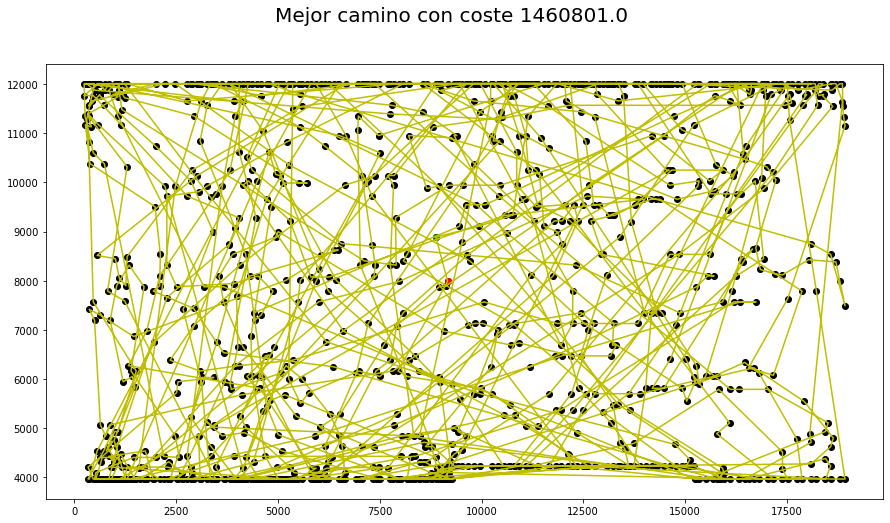

In [18]:
# Busqueda Local El Mejor Aleatorizado
numVecinosLim = round(len(x) / 2)
k = 5
busquedaLocalElMejorAleatorizado(x, y, numVecinosLim, k)

# Enfriamiento Simulado

In [17]:
# Selecciona candidatos
def seleccionaSolucion(sActual, coste):
    rnd1 = random.randint(0,len(sActual) - 1)
    rnd2 = random.randint(0,len(sActual) - 1)
    sCandidata = sActual.copy()
    sCandidata[rnd1], sCandidata[rnd2] = sCandidata[rnd2], sCandidata[rnd1]
    costeCandiata = calculaCosteVecino(coste, sActual, sCandidata, rnd1, rnd2)
    return sCandidata, costeCandiata

In [18]:
# Algoritmo de Enfriamiento Simulado
def enfriamientoSimuladoIteraciones(x, y, mu, phi, L):
    analisisResultado = []
    mejorCam = []
    costeFinal = float("inf")
    for z in range(0,10):
        resultadoIntermedio = []
        tic()
        sActual = solucionAleatoria(len(x),z)
        costeActual = calculaCoste(sActual)
        sBest = sActual.copy()
        costeBest = costeActual  
        numIteraciones = 80 * len(x)
        evaluaciones = 0
        resultado, km = greedy(x, y,"n")
        Tinicial = (mu /(- np.log(phi))) * km
        iterador = 0
        T = Tinicial
        while iterador < numIteraciones:
            for i in range(0,L):
                sCandidata, costeCandidata = seleccionaSolucion(sActual, costeActual)
                evaluaciones += 1
                delta = costeCandidata - costeActual
                exponente = (- delta) / T
                if (delta < 0) or (random.uniform(0, 1) < math.e**exponente):
                    sActual = sCandidata
                    costeActual = costeCandidata
                    if costeActual < costeBest:
                        sBest = sActual
                        costeBest = costeActual
            T = Tinicial / (1 + iterador)
            iterador += 1

        if costeBest < costeFinal:
            costeFinal = costeBest
            mejorCam = sBest.copy()
        
        t = toc()
        resultadoIntermedio.append(z)
        resultadoIntermedio.append(costeBest)
        resultadoIntermedio.append(evaluaciones)
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)
        
    representaResultados(analisisResultado)
    pintaCamino(mejorCam,x,y, costeFinal)

Semilla      Coste  Numero Evaluaciones     Tiempo
0      0.0  1244556.0            1734400.0  32.315700
1      1.0  1300555.0            1734400.0  33.544732
2      2.0  1376859.0            1734400.0  34.276279
3      3.0  1233964.0            1734400.0  31.085475
4      4.0  1290710.0            1734400.0  30.982182
5      5.0  1351564.0            1734400.0  32.372218
6      6.0  1257896.0            1734400.0  39.578328
7      7.0  1236590.0            1734400.0  29.364456
8      8.0  1308672.0            1734400.0  29.175359
9      9.0  1334309.0            1734400.0  31.065703

Media coste:  1293567.5
Desviación típica coste:  50243.484876150855
Media numero de evaluaciones:  1734400.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  32.376043176651


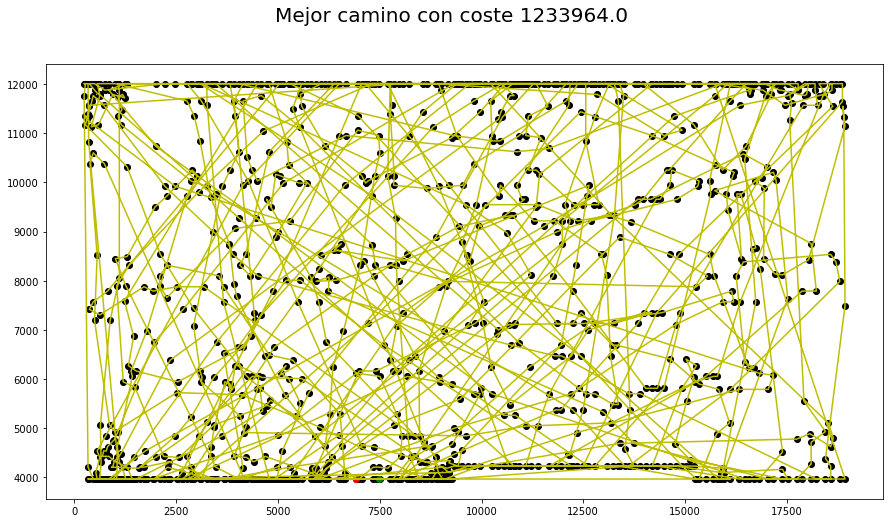

In [19]:
# Algoritmo de Enfriamiento Simulado
# Si el incremento el numero de vecinos (L) aumento la exploración y puedo conseguir llegar a un minimo
# Si el incremento es demasiado bajo, es un algoritmo muy parecido a la busqueda local del mejor aleatorizado
# Con alpha ( o metodo de enfriamiento) y L podemos variar la pendiente de la gráfica, es decir, explorar mas o menos
mu = 0.3
phi = 0.3
L = 20
enfriamientoSimuladoIteraciones(x, y, mu, phi, L)

Semilla      Coste  Numero Evaluaciones     Tiempo
0      0.0  1345341.0            1734400.0  30.875280
1      1.0  1298127.0            1734400.0  30.162025
2      2.0  1225889.0            1734400.0  29.585845
3      3.0  1270685.0            1734400.0  27.386252
4      4.0  1277025.0            1734400.0  31.051441
5      5.0  1340755.0            1734400.0  27.786637
6      6.0  1195260.0            1734400.0  28.711598
7      7.0  1225619.0            1734400.0  29.450304
8      8.0  1311598.0            1734400.0  30.592325
9      9.0  1343282.0            1734400.0  32.896707

Media coste:  1283358.1
Desviación típica coste:  54099.971389292084
Media numero de evaluaciones:  1734400.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  29.849841356277466


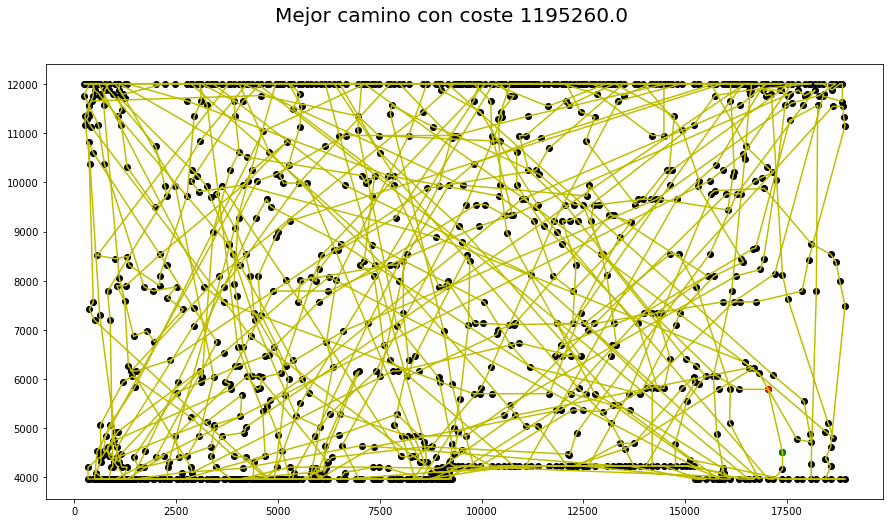

In [19]:
# Algoritmo de Enfriamiento Simulado
mu = 0.3
phi = 0.6
L = 20
enfriamientoSimuladoIteraciones(x, y, mu, phi, L)

Semilla      Coste  Numero Evaluaciones     Tiempo
0      0.0  1322121.0            1734400.0  31.708533
1      1.0  1289002.0            1734400.0  29.212547
2      2.0  1300336.0            1734400.0  29.640512
3      3.0  1355544.0            1734400.0  31.361203
4      4.0  1385458.0            1734400.0  28.248729
5      5.0  1256172.0            1734400.0  27.996297
6      6.0  1244565.0            1734400.0  28.608700
7      7.0  1344058.0            1734400.0  28.518146
8      8.0  1283573.0            1734400.0  30.605028
9      9.0  1282805.0            1734400.0  28.631716

Media coste:  1306363.4
Desviación típica coste:  44838.27627324177
Media numero de evaluaciones:  1734400.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  29.453141045570373


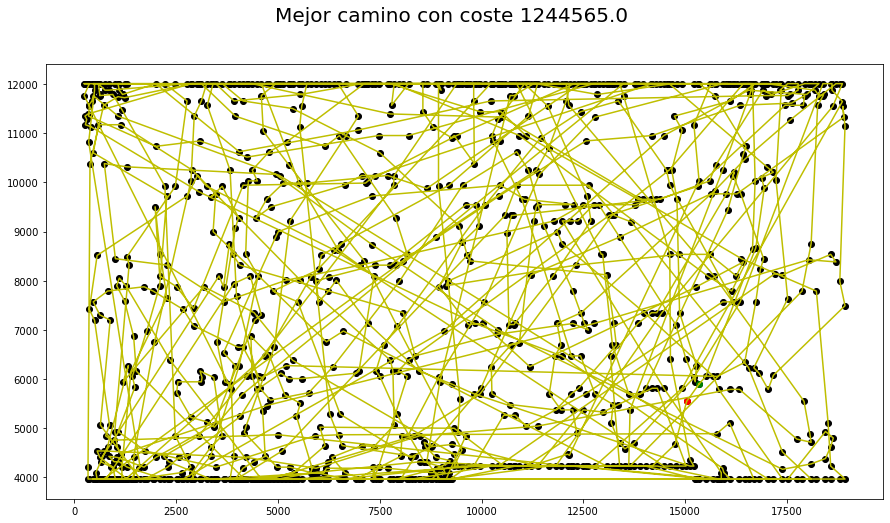

In [21]:
# Algoritmo de Enfriamiento Simulado
mu = 0.6
phi = 0.3
L = 20
enfriamientoSimuladoIteraciones(x, y, mu, phi, L)

Semilla      Coste  Numero Evaluaciones     Tiempo
0      0.0  1177058.0            1734400.0  29.784128
1      1.0  1232245.0            1734400.0  28.451654
2      2.0  1242607.0            1734400.0  29.463862
3      3.0  1232825.0            1734400.0  30.136460
4      4.0  1205138.0            1734400.0  28.778589
5      5.0  1228549.0            1734400.0  28.614567
6      6.0  1306834.0            1734400.0  29.086697
7      7.0  1225077.0            1734400.0  27.868576
8      8.0  1245974.0            1734400.0  31.055423
9      9.0  1316289.0            1734400.0  29.706450

Media coste:  1241259.6
Desviación típica coste:  42105.56926530688
Media numero de evaluaciones:  1734400.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  29.294640517234804


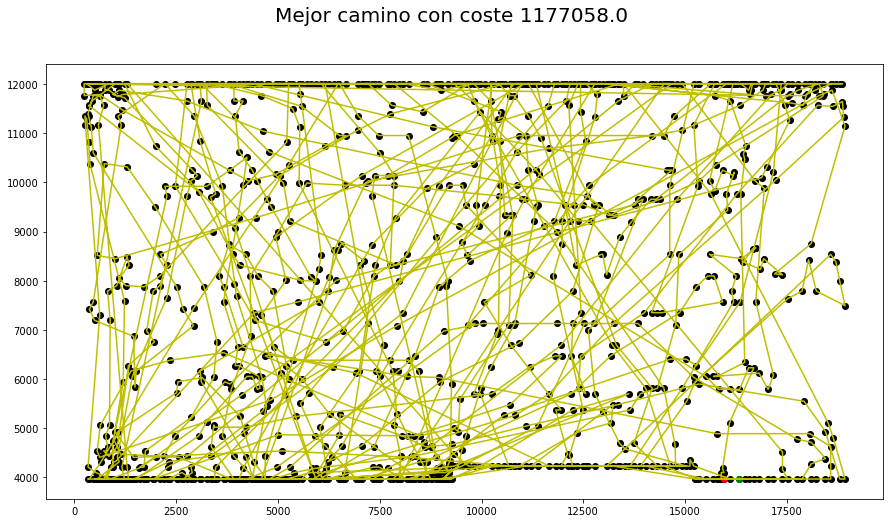

In [22]:
# Algoritmo de Enfriamiento Simulado
mu = 0.6
phi = 0.6
L = 20
enfriamientoSimuladoIteraciones(x, y, mu, phi, L)

Semilla      Coste  Numero Evaluaciones     Tiempo
0      0.0  1071721.0            4336000.0  75.425869
1      1.0  1020677.0            4336000.0  71.446850
2      2.0  1050922.0            4336000.0  78.489079
3      3.0  1075431.0            4336000.0  77.717865
4      4.0  1109442.0            4336000.0  75.888676
5      5.0  1056549.0            4336000.0  74.254599
6      6.0  1156397.0            4336000.0  74.826104
7      7.0  1017962.0            4336000.0  75.015236
8      8.0  1104340.0            4336000.0  79.855906
9      9.0  1123955.0            4336000.0  74.483685

Media coste:  1078739.6
Desviación típica coste:  44801.72786400096
Media numero de evaluaciones:  4336000.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  75.74038696289062


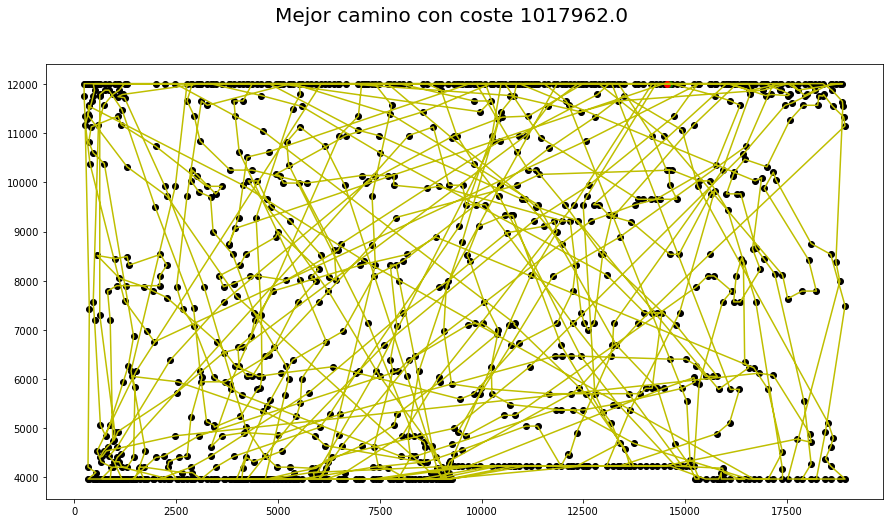

In [23]:
# Algoritmo de Enfriamiento Simulado
mu = 0.6
phi = 0.6
L = 50
enfriamientoSimuladoIteraciones(x, y, mu, phi, L)

# Búsqueda Tabú

In [24]:
# Greedy de la memoria de frecuencia eligiendo el menor
def greedyMenor(memoriaFrecuencias, n):
    memoriaTemporal = memoriaFrecuencias.copy()
    elegidos = []
    for i in range(0,n):
        provisional = np.where(memoriaTemporal[:][i] == np.amin(memoriaTemporal[:][i]))[0][0]
        elegidos.append(provisional)
        memoriaTemporal[: , provisional] = float('inf')
    
    return elegidos

In [25]:
# Algoritmo de búsqueda Tabú
def busquedaTabu(x, y, numVecinos, numIter, numReinici):
    analisisResultado = []
    mejorCam = []
    costeFinal = float("inf")
    for z in range(0,10):
        resultadoIntermedio = []
        tic()
        n = len(x)
        tenenciaTabu = round(n / 2)
        listaTabu = deque(maxlen=tenenciaTabu)
        sActual = solucionAleatoria(len(x),z)
        costeActual = calculaCoste(sActual)
        sBest = sActual.copy()
        costeBest = costeActual
        # Inicializo memoria de frecuencias
        memoriaFrecuencias = np.zeros((len(x),len(y)))
        for i in range(0,n):
            memoriaFrecuencias[i, sActual[i]] += 1
        
        iteraciones = numIter * n
        reinicializacion = round(iteraciones / (numReinici + 1))
        iterador = 0
        for i in range(0,iteraciones):
            # Genero/Analizo Vecinos
            mejorVecino = []
            costeMejor = float("inf")
            for k in range(0,numVecinos):
                piv1 = random.randint(0,len(x) - 1)
                piv2 = random.randint(0,len(x) - 1)
                sCandidata = sActual.copy()
                sCandidata[piv1], sCandidata[piv2] = sCandidata[piv2], sCandidata[piv1]
                costeCandidata = calculaCosteVecino(costeActual, sActual, sCandidata, piv1, piv2)
                iterador += 1
                
                seEvalua = False
                if((piv1,piv2) in listaTabu) or ((piv2,piv1) in listaTabu):
                    #Prueba de aspiración
                    if(costeCandidata < costeBest):
                        seEvalua = True
                else:
                    seEvalua = True
                    
                if (seEvalua and costeCandidata < costeMejor):  
                    mejorVecino = sCandidata.copy()
                    costeMejor = costeCandidata
                    mejorPiv1 = piv1
                    mejorPiv2 = piv2

            # Actualización de variables
            sActual = mejorVecino.copy()
            costeActual = costeMejor
            if costeMejor < costeBest:
                sBest = mejorVecino.copy()
                costeBest = costeMejor        

            # Actualizo Memoria de Frecuencias
            for p in range(0,n):
                memoriaFrecuencias[p, sActual[p]] += 1

            # Actualizo lista tabú
            listaTabu.append((mejorPiv1, mejorPiv2))
            
            # Reinicializaciones
            if ((i + 1) % reinicializacion) == 0:
                rnd = random.random()
                if rnd < 0.25:
                    # Solucion Inicial Aleatoria
                    sActual = random.sample(range(n),n)
                    costeActual = calculaCoste(sActual)
                elif rnd < 0.75:
                    # Solucion Greedy
                    sActual = greedyMenor(memoriaFrecuencias,n)
                    costeActual = calculaCoste(sActual) 
                else:
                    # Solucion es la mejor hasta el momento
                    sActual = sBest.copy()
                    costeActual = costeBest

                # Nueva Tenencia Tabú
                rnd2 = random.uniform(0,1)
                if rnd2 < 0.5:
                    tenenciaTabu = round(tenenciaTabu / 2)
                else:
                    tenenciaTabu = tenenciaTabu + round(tenenciaTabu / 2) 

                listaTabu = deque([],maxlen=tenenciaTabu)
        
        if costeBest < costeFinal:
            costeFinal = costeBest
            mejorCam = sBest.copy()
        
        t = toc()
        resultadoIntermedio.append(z)
        resultadoIntermedio.append(costeBest)
        resultadoIntermedio.append(iterador)
        resultadoIntermedio.append(t)
        analisisResultado.append(resultadoIntermedio)
        
    representaResultados(analisisResultado)
    pintaCamino(mejorCam,x,y, costeFinal)

Semilla      Coste  Numero Evaluaciones      Tiempo
0      0.0  1938944.0            1734400.0   89.158014
1      1.0  1843295.0            1734400.0  176.040770
2      2.0  1770743.0            1734400.0  113.280860
3      3.0  1862866.0            1734400.0   78.151598
4      4.0  1755767.0            1734400.0   78.948681
5      5.0  1785529.0            1734400.0  187.663852
6      6.0  1889042.0            1734400.0  101.403846
7      7.0  1801132.0            1734400.0   99.793448
8      8.0  1910291.0            1734400.0   87.661989
9      9.0  1862887.0            1734400.0   95.397954

Media coste:  1842049.6
Desviación típica coste:  61932.68418425498
Media numero de evaluaciones:  1734400.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  110.75010132789612


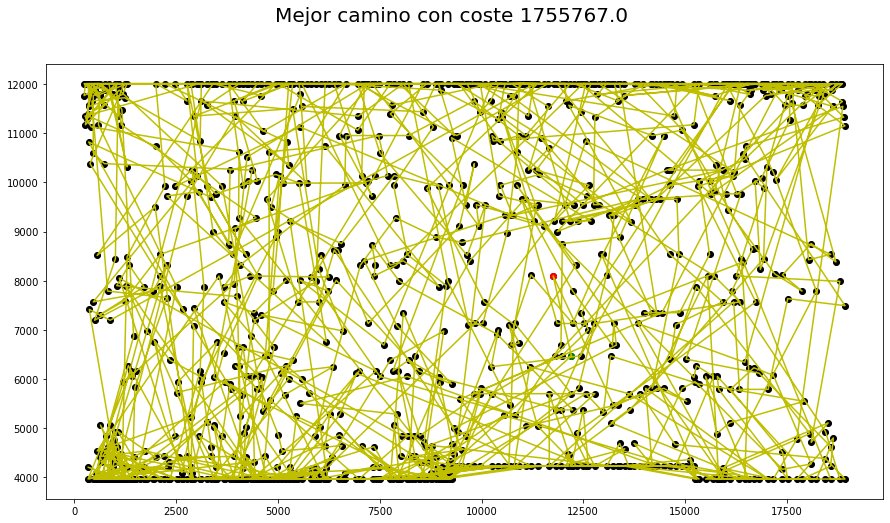

In [18]:
# Ejecución del algoritmo de Búsqueda Tabú
numIter = 40
numReinici = 4
numVecinos = 40
busquedaTabu(x, y, numVecinos, numIter, numReinici)

Semilla      Coste  Numero Evaluaciones      Tiempo
0      0.0  1774117.0            2601600.0  164.588939
1      1.0  1822761.0            2601600.0  358.041463
2      2.0  1758219.0            2601600.0  172.642087
3      3.0  1749147.0            2601600.0  262.470187
4      4.0  1760009.0            2601600.0  237.999662
5      5.0  1760010.0            2601600.0  231.993497
6      6.0  1755613.0            2601600.0  185.613619
7      7.0  1725362.0            2601600.0  150.643476
8      8.0  1719557.0            2601600.0  134.890357
9      9.0  1750383.0            2601600.0  156.106509

Media coste:  1757517.8
Desviación típica coste:  28175.519602031203
Media numero de evaluaciones:  2601600.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  205.4989795923233


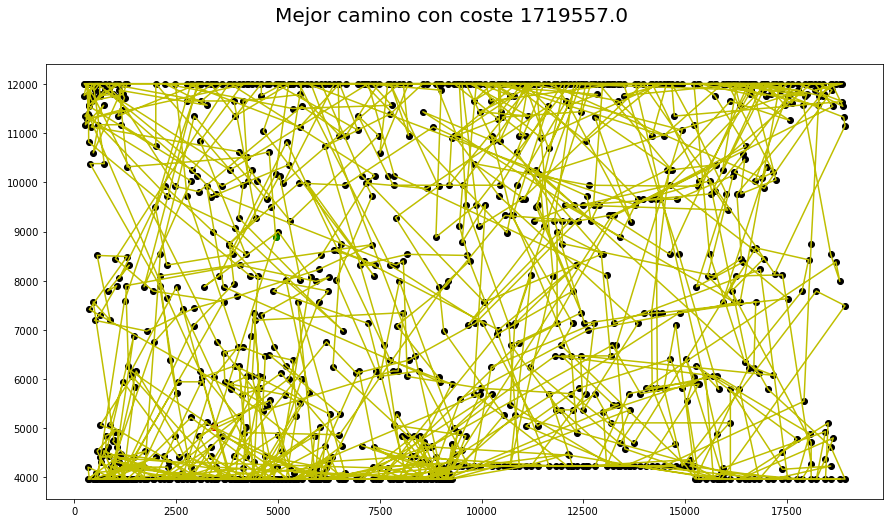

In [26]:
# Ejecución del algoritmo de Búsqueda Tabú
numIter = 60
numReinici = 4
numVecinos = 40
busquedaTabu(x, y, numVecinos, numIter, numReinici)

Semilla      Coste  Numero Evaluaciones      Tiempo
0      0.0  1914082.0            1734400.0   67.439607
1      1.0  1870560.0            1734400.0   65.557298
2      2.0  1971308.0            1734400.0   65.806218
3      3.0  1908136.0            1734400.0   67.412591
4      4.0  1960852.0            1734400.0   59.518936
5      5.0  1901372.0            1734400.0   60.683956
6      6.0  1955454.0            1734400.0   69.348099
7      7.0  1938821.0            1734400.0  101.684202
8      8.0  1990720.0            1734400.0   74.450958
9      9.0  1908688.0            1734400.0   93.683695

Media coste:  1931999.3
Desviación típica coste:  37370.74593864981
Media numero de evaluaciones:  1734400.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  72.55855596065521


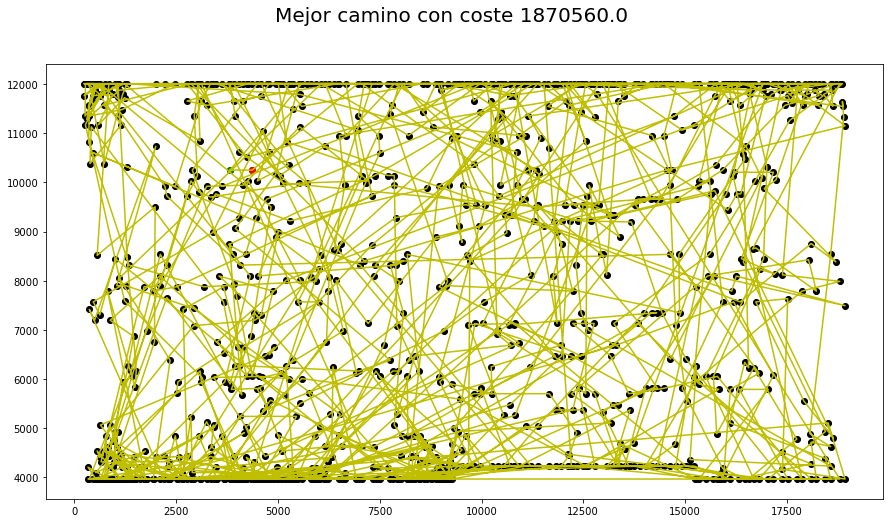

In [27]:
# Ejecución del algoritmo de Búsqueda Tabú
numIter = 40
numReinici = 150
numVecinos = 40
busquedaTabu(x, y, numVecinos, numIter, numReinici)

Semilla      Coste  Numero Evaluaciones      Tiempo
0      0.0  1382146.0            3035200.0  335.829829
1      1.0  1534267.0            3035200.0  234.753548
2      2.0  1401842.0            3035200.0  233.440441
3      3.0  1562364.0            3035200.0  214.763985
4      4.0  1628533.0            3035200.0  233.573871
5      5.0  1336343.0            3035200.0  262.255828
6      6.0  1412542.0            3035200.0  265.591895
7      7.0  1366836.0            3035200.0  273.426794
8      8.0  1593413.0            3035200.0  221.219072
9      9.0  1451447.0            3035200.0  217.576788

Media coste:  1466973.3
Desviación típica coste:  104056.45140558187
Media numero de evaluaciones:  3035200.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  249.24320514202117


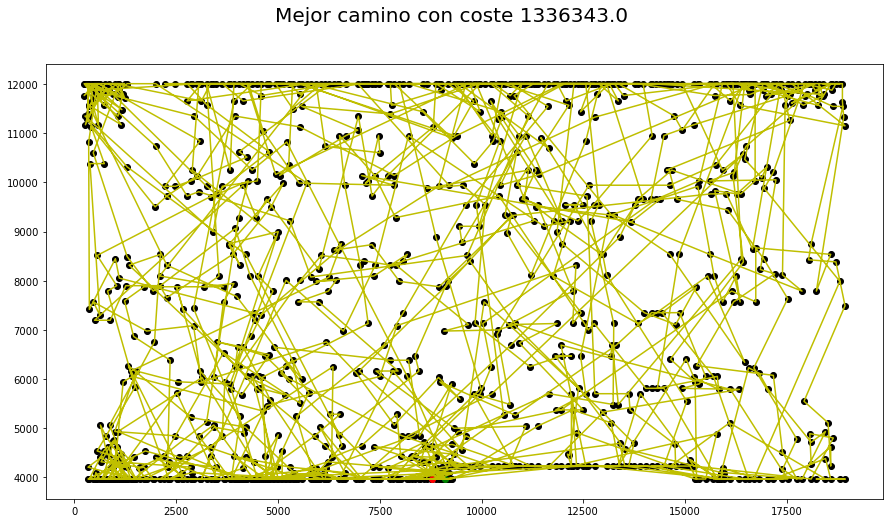

In [28]:
# Ejecución del algoritmo de Búsqueda Tabú
numIter = 40
numReinici = 4
numVecinos = 70
busquedaTabu(x, y, numVecinos, numIter, numReinici)

Semilla      Coste  Numero Evaluaciones      Tiempo
0      0.0  1343540.0            4552800.0  282.163639
1      1.0  1395442.0            4552800.0  235.667768
2      2.0  1392308.0            4552800.0  366.393448
3      3.0  1428142.0            4552800.0  193.005320
4      4.0  1455416.0            4552800.0  538.439990
5      5.0  1323983.0            4552800.0  251.393567
6      6.0  1431706.0            4552800.0  602.840055
7      7.0  1374054.0            4552800.0  345.663566
8      8.0  1446125.0            4552800.0  327.026130
9      9.0  1467155.0            4552800.0  145.795571

Media coste:  1405787.1
Desviación típica coste:  48177.9491686809
Media numero de evaluaciones:  4552800.0
Desviación típica de evaluaciones:  0.0
Media tiempo:  328.8389053583145


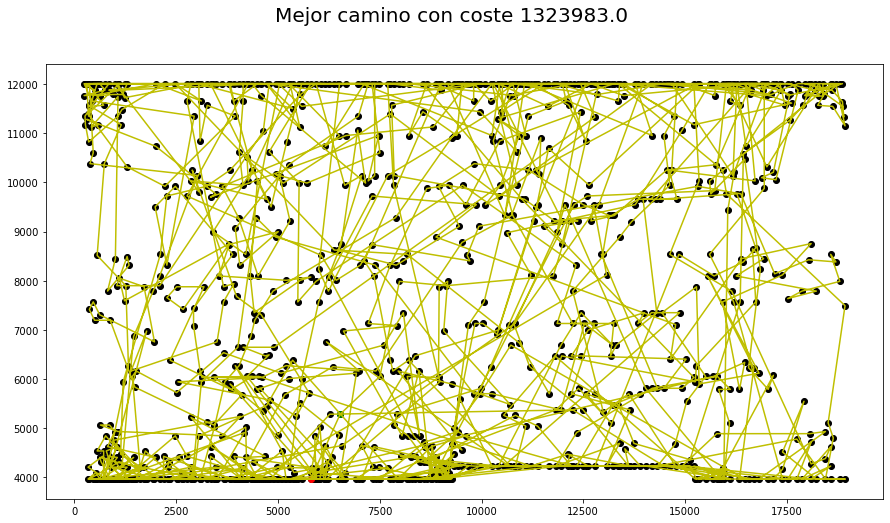

In [29]:
# Ejecución del algoritmo de Búsqueda Tabú
numIter = 60
numReinici = 10
numVecinos = 70
busquedaTabu(x, y, numVecinos, numIter, numReinici)